In [70]:
# These lines import the Numpy and Pandas modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

#### DATA/CS/Stat 11800 Intro to Data Science 1
## Fall 2021 - Now, with Pandas!

##  Demos for Lecture 4a - Dataframes 



<div>
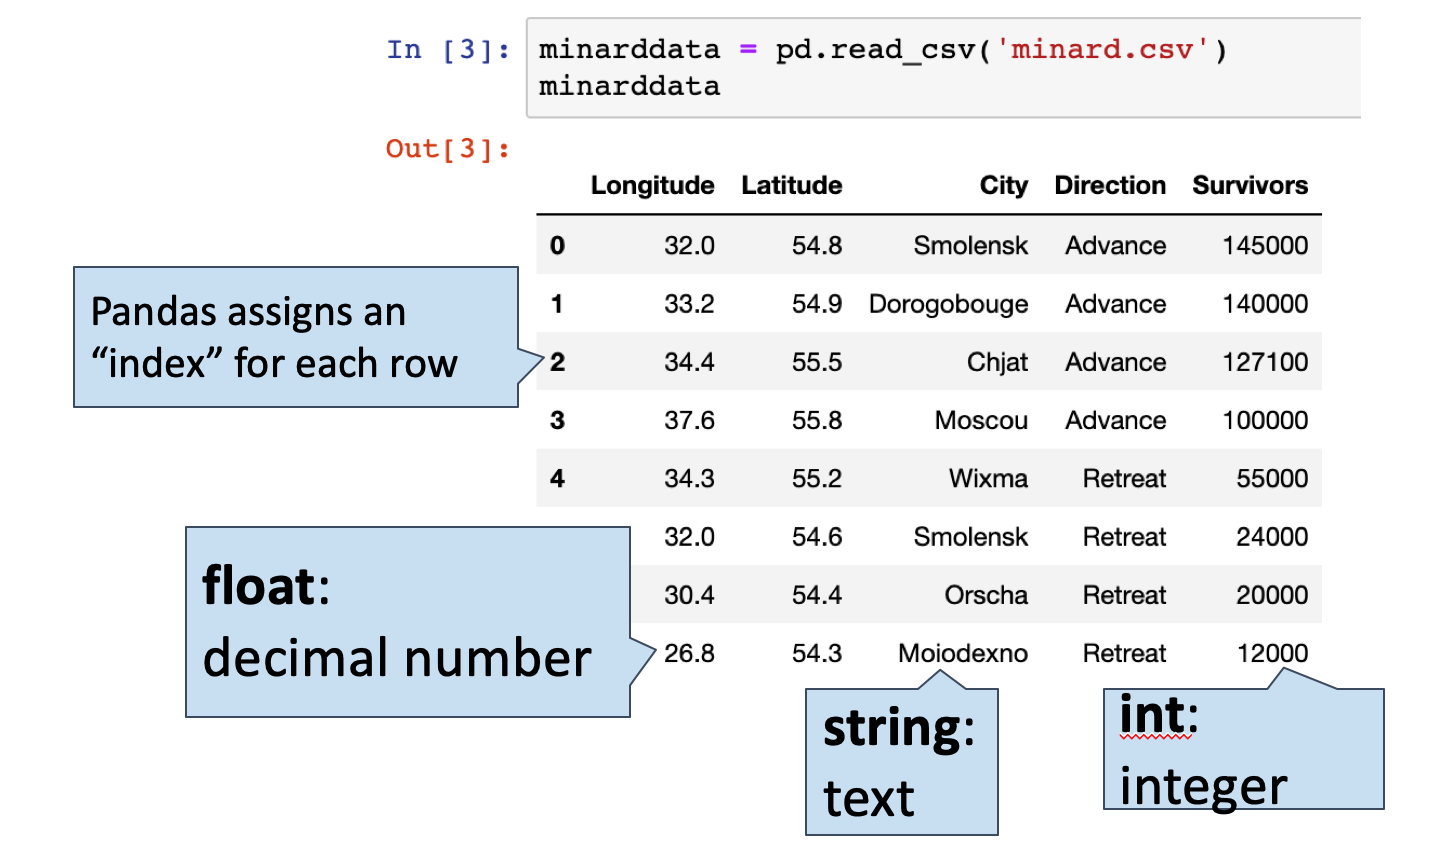
</div>


<br> 

### Pandas defines a basic collection data type called a "series" that is analogous to a one dimentional array in numpy.

In [71]:
colors = pd.Series( ['red','blue','green'] )
colors

0      red
1     blue
2    green
dtype: object

### Series are a bit more flexible than arrays.  For example you can specify your own index for a series, and the indexes don't have to be integers.

In [72]:
colors = pd.Series(['red','blue','green'], index=["R", "B", "G"])
colors

R      red
B     blue
G    green
dtype: object

In [73]:
# and if I want, I can retrieve rows
print(colors.loc["R"])
colors.loc["G"]

red


'green'

In [74]:
[colors["R"], colors["B"]]

['red', 'blue']

In [75]:
colors["R"], colors["B"], "See them this way"

('red', 'blue', 'See them this way')

In [76]:
colors["R"]

'red'

In [77]:
# or sets of rows, by name 
colors.loc[ ["R", "G", "B", "B", "B"] ]

R      red
G    green
B     blue
B     blue
B     blue
dtype: object

In [78]:
colors.loc[ ["R", "G", "B", "B", "X"] ]

KeyError: "['X'] not in index"

## A dataframe is a sequence of aligned series objects
- “aligned” means that they share the same index


## Here are some different ways to create DataFrames

In [79]:
# Make a dataframe from a dictionary: { "columnname":  [list of values] }

df1 = pd.DataFrame(
    {"a": [4,5,6],
     "b": [7,8,9],
     "c": [10,11,12]},
    index = ['row_one','row_two','row_three']
    )
df1

,a,b,c
row_one,4,7,10
row_two,5,8,11
row_three,6,9,12


### Notice that the DataFrame has  indexes for the rows and column names across the top (also an index).  Thus, any "cell" in the DataFrame can be referenced by specifying the column and the row index.

In [80]:
# Another way to build a dataframe:   list-of-lists  (by column!), list for index, list for columns
df2 = pd.DataFrame(
    [[4,5,6],
     [7,8,9],
     [10,11,12]],
    index = ['row_one','row_two','row_three'],
    columns=["a","b","c"]
    )
df2

,a,b,c
row_one,4,5,6
row_two,7,8,9
row_three,10,11,12


In [81]:
# or if you leave out the row index Pandas creates an index 
# of `range(len(df)-1)`
df3 = pd.DataFrame(
    {"a": [4,5,6],
     "b": [7,8,9],
     "c": [10,11,12]}
    )
df3

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


In [82]:
df4 = pd.DataFrame(
    {"a": [4,5,6],
     "b": [7,8,9],
     "c": [10,11,12]}
    )
df4

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


In [83]:
df4.columns = ["a", "b", "c"]
df4

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


In [84]:
df4.index = ["row1", "row2", "row3"]
df4

,a,b,c
row1,4,7,10
row2,5,8,11
row3,6,9,12


### Here, we left out the index values so Pandas inserted them, starting with index "0" (of course!).  What if you don't specify the column names?

In [85]:
df4 = pd.DataFrame(
    [[4,5,6],
     [7,8,9],
     [10,11,12]]
    )
df4

,0,1,2
0,4,5,6
1,7,8,9
2,10,11,12


In [86]:
df4.index = np.arange(0,300,100)
df4

,0,1,2
0,4,5,6
100,7,8,9
200,10,11,12


### Likewise, if you don't give column names, Pandas will create them for you - again as integers starting with 0.

## Typing in your data one element at a time is slow going.   Perhaps you have a "data file" that you would like to ingest.   Speaking of ingesting, how about some ice cream???

In [87]:
#cones.csv is a comma separated value file that I happen to a have in my local directory
%cat cones.csv

cat: cones.csv: No such file or directory


In [88]:
#Pandas provides a function for reading csv files into dataframes
cones = pd.read_csv('./data/cones.csv')

In [89]:
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [90]:
#What columns are there in the table?
cones.columns

Index(['Flavor', 'Color', 'Price'], dtype='object')

In [91]:
type(cones.columns)

pandas.core.indexes.base.Index

Notice that the datatype for pandas column names is "Index"

In [92]:
#Maybe we'd prefer to see them as a list?
cones.columns.tolist()

['Flavor', 'Color', 'Price']

In [93]:
cones.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Flavor', 'Color', 'Price'], dtype='object')>

In [94]:
cones.columns.tolist()[ 1 ]

'Color'

In [95]:
#What are the column types?
cones.dtypes

Flavor     object
Color      object
Price     float64
dtype: object

In [96]:
#how many rows?
len(cones)

6

In [97]:
#Or we could ask for number of rows and columns 
cones.shape

(6, 3)

In [98]:
#okay - lets look at the table contents
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [99]:
#let's look at a column
cones.Flavor

0    strawberry
1     chocolate
2     chocolate
3    strawberry
4     chocolate
5     bubblegum
Name: Flavor, dtype: object

In [100]:
#just to see what is going on here
print("'cones'is a ", type(cones))
print("'cones.Flavor'is a ", type(cones.Flavor))
print("One of the elements is type", type(cones["Flavor"][0]))

'cones'is a  <class 'pandas.core.frame.DataFrame'>
'cones.Flavor'is a  <class 'pandas.core.series.Series'>
One of the elements is type <class 'str'>


In [101]:
#What's the average price of a cone?
print(cones.Price)
print()
print('The average cone price is:', cones.Price.mean())

0    3.55
1    4.75
2    5.25
3    5.25
4    5.25
5    4.75
Name: Price, dtype: float64

The average cone price is: 4.8


In [102]:
 cones.Price.describe()

count    6.000000
mean     4.800000
std      0.659545
min      3.550000
25%      4.750000
50%      5.000000
75%      5.250000
max      5.250000
Name: Price, dtype: float64

In [103]:
cones.describe?

Signature:
cones.describe(
    percentiles=None,
    include=None,
    exclude=None,
    datetime_is_numeric=False,
) -> 'FrameOrSeries'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included

In [104]:
#Here's an alternate way to do it
cones['Flavor']

0    strawberry
1     chocolate
2     chocolate
3    strawberry
4     chocolate
5     bubblegum
Name: Flavor, dtype: object

In [105]:
np.mean(cones['Price'])

4.8

In [106]:
#This notation is handy if you want to extract multiple columns
cones[ ['Color','Flavor'] ]

,Color,Flavor
0,pink,strawberry
1,light brown,chocolate
2,dark brown,chocolate
3,pink,strawberry
4,dark brown,chocolate
5,pink,bubblegum


In [107]:
#Note, none of the above has altered our original cones dataframe
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [108]:
#If you want to keep the result with fewer columns you need to assign it
#to a variable
cones_no_color = cones[['Flavor','Price']]

In [109]:
cones[Flavor] 

NameError: name 'Flavor' is not defined

In [ ]:
cones["Flavor"]

In [110]:
cones_no_color

,Flavor,Price
0,strawberry,3.55
1,chocolate,4.75
2,chocolate,5.25
3,strawberry,5.25
4,chocolate,5.25
5,bubblegum,4.75


In [111]:
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


### In the above we chose columns from the dataframe.  We can also choose rows

In [112]:
cones.head(2)

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75


In [113]:
cones.tail(3)

,Flavor,Color,Price
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [114]:
list(range(2,3))

[2]

In [115]:
#You can chose rows by slicing
cones.loc[2:3]

,Flavor,Color,Price
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25


In [116]:
cones.loc[3:1:-1]

,Flavor,Color,Price
3,strawberry,pink,5.25
2,chocolate,dark brown,5.25
1,chocolate,light brown,4.75


In [117]:
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


## Chosing rows based on values can be done with "query"

In [118]:
#note the use of two different types of quotes - single for the query string, and double for
# the string "chocolate"
cones.query(   'Flavor == "chocolate"   '     )

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25


In [119]:
cones.query('Flavor == "chocolate" and Price < 5.0')

,Flavor,Color,Price
1,chocolate,light brown,4.75


In [120]:
cones.query('not(Flavor == "chocolate" or Price < 5.0)')

,Flavor,Color,Price
3,strawberry,pink,5.25


## Choosing rows based on values can also be done with "loc" 

### Note: "loc" is an attribute of a dataframe so it is indexed using square brackets.  In contrast, "query" is a function (a.k.a. method) of a dataframe, so it is called using parentheses (like any function)

### Also note that compared to "query", "loc" is a bit more cumbersome for simple things.  For example you have type the name of the DataFrame multiple times

In [121]:
# a comparison on a column creates a boolean array
cones.Flavor == 'chocolate'

0    False
1     True
2     True
3    False
4     True
5    False
Name: Flavor, dtype: bool

In [122]:
np.count_nonzero(cones.Flavor == 'chocolate')

3

In [123]:
(cones.Flavor == "chocolate").sum()

3

In [124]:
#loc uses the boolean array to keep only those rows that are "True"
cones.loc[cones.Flavor == 'chocolate']

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25


In [125]:
#you can do row selction with multiple conditions
cones.loc[   (cones.Flavor == 'chocolate') & (cones.Price < 5.0)  ]

,Flavor,Color,Price
1,chocolate,light brown,4.75


In [126]:
#this is how to do "or"
cones.query('Flavor == "chocolate" | Price <5.0')

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [127]:
#You can also use this alternative syntax
cones.loc[cones['Flavor'] == 'chocolate']

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25


## Sorting rows by values

In [128]:
#Default sort is ascending
cones.sort_values(by='Price')

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
5,bubblegum,pink,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25


In [129]:
#Can override that default if you like
cones.sort_values(by='Price', ascending=False)

,Flavor,Color,Price
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
1,chocolate,light brown,4.75
5,bubblegum,pink,4.75
0,strawberry,pink,3.55


In [130]:
cones.sort_values("Flavor")

,Flavor,Color,Price
5,bubblegum,pink,4.75
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25
0,strawberry,pink,3.55
3,strawberry,pink,5.25


In [131]:
#You don't have to sort by numeric values...
cones.sort_values(by='Flavor', ascending=False)

,Flavor,Color,Price
0,strawberry,pink,3.55
3,strawberry,pink,5.25
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


### NBA Salary Example


Let's use a different table - NBA player salaries (from 2015-16)

In [132]:
# This table can be found online: 
# https://www.statcrunch.com/app/index.php?dataid=1843341
# NBA players, 2015-2016 season
# I have it in my local directory
# You can use a shell command to look at the first few lines of the .csv
!head nba_salaries.csv

head: nba_salaries.csv: No such file or directory


In [133]:
# Read the data into a dataframe
nba = pd.read_csv('./data/nba_salaries.csv')
nba[:10]

,RANK\tPLAYER\tPOSITION\tTEAM\tSALARY ($M)
0,1\tKobe Bryant\tSF\tLos Angeles Lakers\t25
1,2\tJoe Johnson\tSF\tBrooklyn Nets\t24.894863
2,3\tLeBron James\tSF\tCleveland Cavaliers\t22.9705
3,4\tCarmelo Anthony\tSF\tNew York Knicks\t22.875
4,5\tDwight Howard\tC\tHouston Rockets\t22.359364
5,6\tChris Bosh\tPF\tMiami Heat\t22.19273
6,7\tChris Paul\tPG\tLos Angeles Clippers\t21.46...
7,8\tKevin Durant\tSF\tOklahoma City Thunder\t20...
8,9\tDerrick Rose\tPG\tChicago Bulls\t20.093064
9,10\tDwyane Wade\tSG\tMiami Heat\t20


### That last column name is  going to be hard to type so let's change it

In [134]:
nba = nba.rename(columns = {"'15-'16 SALARY":"SALARY"})
nba.head(10)

,RANK\tPLAYER\tPOSITION\tTEAM\tSALARY ($M)
0,1\tKobe Bryant\tSF\tLos Angeles Lakers\t25
1,2\tJoe Johnson\tSF\tBrooklyn Nets\t24.894863
2,3\tLeBron James\tSF\tCleveland Cavaliers\t22.9705
3,4\tCarmelo Anthony\tSF\tNew York Knicks\t22.875
4,5\tDwight Howard\tC\tHouston Rockets\t22.359364
5,6\tChris Bosh\tPF\tMiami Heat\t22.19273
6,7\tChris Paul\tPG\tLos Angeles Clippers\t21.46...
7,8\tKevin Durant\tSF\tOklahoma City Thunder\t20...
8,9\tDerrick Rose\tPG\tChicago Bulls\t20.093064
9,10\tDwyane Wade\tSG\tMiami Heat\t20


In [135]:
#list the players from the Chicago Bulls
#nba.loc[nba.TEAM == 'Chicago Bulls']
nba.query('TEAM == "Chicago Bulls"')

UndefinedVariableError: name 'TEAM' is not defined

In [ ]:
#nba.loc[nba.PLAYER == 'Stephen Curry']
nba.query('PLAYER == "Stephen Curry"')

In [ ]:

#how many different positions are in the data set?
nba['POSITION'].nunique()

In [ ]:
nba['POSITION'].drop_duplicates()

In [ ]:
nba['POSITION'].value_counts()

In [ ]:
#Who were the top 10 highest paid players?
#(note the "method chaining" using ".")
nba.sort_values(by='SALARY',ascending=False).head(10)

In [ ]:
#Show the top 15 highest paid Point Guards in descending order of SALARY
nba.loc[nba.POSITION == 'PG'].sort_values(by='SALARY', ascending=False).head(15)

How complete is the data set? from: nba.com/news/faq: 

"How many players are on a NBA roster?
Each NBA team can have a maximum of 15 players, 13 of which can be active each game."

In [ ]:
#So lets count players on teams
#We'll need to do some renaming to make things look prettier
df = pd.DataFrame(nba.groupby('TEAM').TEAM.count())
df=df.rename(columns = {'TEAM':'COUNT'})
df=df.sort_values(by='COUNT',ascending=False)
df.reset_index(inplace=True)
df

Seems like it's not very complete - lots of teams with fewer than 15 (and then some with a bunch more)!!!

In [ ]:
df.query('COUNT < 15')

In [ ]:
df.query('COUNT > 15')

In [ ]:
df.query('COUNT == 15')

Seems like we would need to understand this dataset a bit better before we draw too many conclusions from it!   

In [ ]:
minard=pd.read_csv("./data/minard.csv")

In [ ]:
minard["Latitude"]

In [ ]:
minard[ [ "City", "Latitude", "Longitude"] ] 

In [ ]:
minard.loc[2:4]

In [ ]:
minard.iloc[2:4]

In [ ]:
minard.loc[ 3, "City"]

In [ ]:
minard["City"][3]